In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?

In [2]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

# FNN for MNIST¶
using tf.learn

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

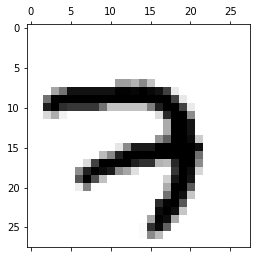

7


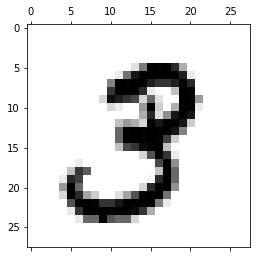

3


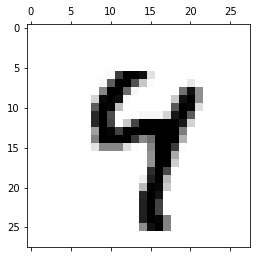

4


In [5]:
import matplotlib.pyplot as plt
for i in range(0,3):
    train_img = np.reshape(X_train[i, :], (28, 28))
    plt.matshow(train_img, cmap = plt.get_cmap('binary'))
    plt.show()
    print(y_train[i])

In [6]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=4000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E96FDB3C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\burt\\AppData\\Local\\Temp\\tmp15_wt50_'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create Che

SKCompat()

In [7]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\burt\AppData\Local\Temp\tmp15_wt50_\model.ckpt-4000


0.97860000000000003

In [8]:
%run ../../ConfusionMatrix.ipynb   

Confusion matrix, without normalization
[[ 970    0    0    0    1    3    1    1    3    1]
 [   0 1124    2    1    0    2    2    1    3    0]
 [   4    0 1010    5    1    0    1    6    5    0]
 [   0    0    3  997    0    2    0    4    2    2]
 [   0    0    3    1  958    0    5    1    0   14]
 [   2    1    0   11    2  864    4    1    5    2]
 [   5    2    2    0    2    4  940    0    3    0]
 [   2    8    8    2    0    0    0 1004    1    3]
 [   3    1    4   11    2    4    2    4  939    4]
 [   3    4    0    9    6    1    1    5    0  980]]


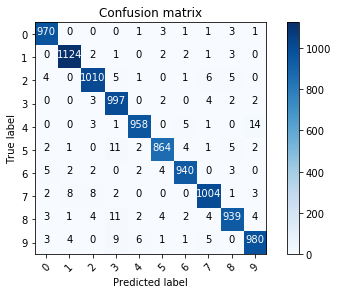

In [9]:
cnf_matrix = confusion_matrix(y_test, y_pred['classes'])
plot_confusion_matrix(cnf_matrix, range(0,10))
plt.show()

In [11]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [12]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [13]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [14]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [15]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [16]:
learning_rate = 0.01

with tf.name_scope("train"):12;pn0 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [17]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [18]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [19]:
n_epochs = 40
batch_size = 50

In [20]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94 Val accuracy: 0.9168
1 Train accuracy: 0.94 Val accuracy: 0.934
2 Train accuracy: 1.0 Val accuracy: 0.9462
3 Train accuracy: 0.92 Val accuracy: 0.9494
4 Train accuracy: 0.98 Val accuracy: 0.9562
5 Train accuracy: 1.0 Val accuracy: 0.9598
6 Train accuracy: 1.0 Val accuracy: 0.963
7 Train accuracy: 0.94 Val accuracy: 0.9634
8 Train accuracy: 0.98 Val accuracy: 0.9672
9 Train accuracy: 0.98 Val accuracy: 0.9676
10 Train accuracy: 0.98 Val accuracy: 0.9678
11 Train accuracy: 0.98 Val accuracy: 0.9706
12 Train accuracy: 1.0 Val accuracy: 0.9696
13 Train accuracy: 0.98 Val accuracy: 0.972
14 Train accuracy: 0.98 Val accuracy: 0.9722
15 Train accuracy: 0.96 Val accuracy: 0.9716
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 1.0 Val accuracy: 0.9726
18 Train accuracy: 1.0 Val accuracy: 0.9722
19 Train accuracy: 0.98 Val accuracy: 0.9734
20 Train accuracy: 0.98 Val accuracy: 0.9752
21 Train accuracy: 1.0 Val accuracy: 0.9748
22 Train accuracy: 0.98 Val acc

In [21]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [22]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [24]:
y_pred.shape,X

((20,), <tf.Tensor 'X:0' shape=(?, 784) dtype=float32>)